<a href="https://colab.research.google.com/github/m-arifin-ilham/bike-ridership-analysis/blob/submission/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Arifin Ilham
- **Email:** arifinsmp5@gmail.com
- **ID Dicoding:** arifin_ilham_r315

## Menentukan Pertanyaan Bisnis


- Bagaimana trend total penggunaan sepeda dari bulan ke bulan?

- Hari apa yang memiliki rata-rata penggunaan sepeda tertinggi?

## Import Semua Packages/Library yang Digunakan

Pada tahap ini, dilakukan import semua packages/library yang digunakan. Mulai dari numpy, pandas, hingga seaborn.

In [60]:
# installing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Selanjutnya pada tahap ini, dilakukan pengumpulan data yang berupa dataset. Dataset yang digunakan adalah **bike sharing dataset** yang terdiri atas dua file csv, yaitu "**day.csv**" dan "**hour.csv**", yang diambil dari Kaggle (https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/data).

Menurut dokumentasi yang tertera, **hour.csv** dan **day.csv**, secara berturut-turut, berisi **catatan jumlah penggunaan sepeda sewaan** dari tahun **2011** dan **2012** per **jam** dan per **hari** di sistem **bike sharing Capital** dengan informasi **cuaca dan musim** yang bersangkutan. Kedua file tersebut memiliki kolom-kolom di bawah ini, dengan pengecualian kolom hr yang tidak tersedia di file day.csv.

- **instant**: indeks catatan
- **dteday** : tanggal
- **season** : musim (1: musim dingin, 2: musim semi, 3: musim panas, 4:musim gugur)
- **yr** : tahun (0: 2011, 1:2012)
- **mnth** : bulan ( 1 hingga 12)
- **hr** : jam (0 hingga 23)
- **holiday** : jika hari libur ditulis 1 (extracted from [Web Link])
- **weekday** : hari
- **workingday** : jika hari tersebut hari kerja dan tidak libur ditulis 1, selain itu ditulis 0
- **weathersit** : keadaan cuaca

1: Clear, Few clouds, Partly cloudy, Partly clouds

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- **temp** : suhu ternormalisasi dengan satuan Celsius
- **atemp**: suhu terasa yang ternormalisasi dengan satuan Celsius
- **hum**: kelembaban ternormalisasi
- **windspeed**: kecepatan angin ternormalisasi
- **casual**: jumlah pengguna kasual
- **registered**: jumlah pengguna terdaftar/teregistrasi
- **cnt**: total pengguna, baik kasual maupun terdaftar

Kedua file tersebut selanjutnya akan dimuat menjadi dataframe.

In [61]:
# read datasets
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

Berikutnya, dilakukan pengecekan awal pada kedua dataframe tersebut untuk memastikan isi datanya.

In [62]:
# inspect day_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [63]:
# inspect hour_df
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Terlihat bahwa kedua tabel di atas terlihat cukup wajar. Untuk memastikannya lebih lanjut, kedua tabel tersebut akan diinspeksi pada bagian selanjutnya.

**Insight:**
- Pada bagian ini, dibuat **dua tabel** berisi data **catatan harian dan per jam** dari **penggunaan sepeda** pada sistem bike sharing Capital dari tahun **2011** dan **2012**.
- Dari inspeksi awal, data kedua tabel terlihat cukup **wajar**.

### Assessing Data

 Selanjutnya, dilakukan pengecekan data pada kedua dataframe. Pertama, akan dilakukan pengecekan pada dataframe day_df.

In [64]:
# day_df summary
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari sini, diperoleh bahwa kolom dteday direpresentasikan dalam tipe data object, yang seharusnya berupa datetime.

In [65]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Dari sini, diperoleh bahwa dataframe day_df tidak memiliki data kosong.

In [66]:
day_df.duplicated().sum()

0

Diperoleh juga bahwa tidak ada data duplikat di dalam dataframe tersebut.

In [67]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Lebih lanjut, dari tabel di atas, tidak terdapat keanehan pada distribusi data masing-masing kolom pada dataframe day_df. Sekarang, akan dilakukan pengecekan pada dataframe hour_df.

In [68]:
# hour_df summary
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti sebelumnya, tidak diperoleh kesalahan pada tipe data masing-masing kolom kecuali pada kolom dteday.

In [69]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Dieroleh pula bahwa tidak ada data kosong (missing data) pada dataframe ini.

In [70]:
hour_df.duplicated().sum()

0

Juga tidak ditemukan data duplikat.

In [71]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Dari sini, tidak ditemukan keanehan pada distribusi data masing-masing kolom dataframe hour_df.

**Insight:**
- Pada dataframe **day_df**, tipe data kolom **dteday** perlu diubah menjadi **datetime**.
- Pada dataframe **hour_df**, tipe data kolom **dteday** juga perlu diubah menjadi **datetime**.

### Cleaning Data

Pada tahap ini, masalah yang terungkap pada tahap sebelumnya akan ditangani sekarang, yaitu perubahan tipe data kolom dteday pada kedua dataframe tersebut.

In [72]:
datetime_col = "dteday"
dfs = [day_df, hour_df]

for df in dfs:
  df[datetime_col] = pd.to_datetime(df[datetime_col])

Selanjutnya, akan dilakukan pengecekan untuk mengetahui apakah perubahan tersebut berhasil.

In [73]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Dari sini, didapat perubahan tipe data berhasil untuk dataframe day_df.

In [74]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Diperoleh pula bahwa perubahan tipe data berhasil untuk dataframe hour_df.

**Insight:**
- Pada dataframe **day_df**, dilakukan perubahan tipe data kolom **dteday** dari **object** menjadi **datetime**.
- Pada dataframe **hour_df**, juga dilakukan perubahan tipe data kolom **dteday** dari **object** menjadi **datetime**.

## Exploratory Data Analysis (EDA)

### Explore the Averages by Parameters

Pada tahap ini, akan dilakukan EDA. Akan dicari tahu bagaimana rata-rata dari jumlah pengguna total (cnt), pengguna kasual, dan pengguna teregistrasi jika digolongkan berdasarkan parameter tertentu.

Berikut dilakukan analisis rata-rata dari pengguna harian dengan penggolongan berdasarkan nama hari.

In [75]:
day_grouping_df = day_df.copy()
day_grouping_df["day_name"] = day_df["dteday"].dt.strftime('%w-%A')
day_grouping_df = day_grouping_df.groupby(by="day_name").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})
day_grouping_df = day_grouping_df.reset_index()
day_grouping_df

,day_name,casual,registered,cnt
0,0-Sunday,1338.295238,2890.533333,4228.828571
1,1-Monday,674.133333,3663.990476,4338.123810
2,2-Tuesday,556.182692,3954.480769,4510.663462
3,3-Wednesday,551.144231,3997.394231,4548.538462
4,4-Thursday,590.961538,4076.298077,4667.259615
5,5-Friday,752.288462,3938.000000,4690.288462
6,6-Saturday,1465.257143,3085.285714,4550.542857


Dari tabel di atas, dapat diasumsikan bahwa:
1. rata-rata banyak pengguna **kasual** ketika **akhir pekan** (yaitu Sabtu dan Minggu) lebih **tinggi** dibandingkan ketika hari kerja (Senin-Jumat),
2. rata-rata banyak pengguna **terdaftar** ketika **akhir pekan** lebih **rendah** dibandingkan ketika hari kerja,
3. rerata pengguna **keseluruhan** memiliki pola yang sama dengan rerata pengguna **teregistrasi** dengan intensitas **perbedaan antar hari** yang lebih **rendah**.

Hal ini mengindikasikan bahwa pengguna **terdaftar** menyewa sepeda dengan tujuan untuk **urusan kerja** (berangkat pulang) dan pengguna **kasual** menyewa dengan tujuan relatif **santai**, seperti berolahraga.

Untuk menyelidiki asumsi tersebut, akan dilakukan analisis rata-rata pengguna sepeda harian dengan penggolongan berdasarkan hari kerja.

In [76]:
workday_df = day_df.groupby(by="workingday").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})
workday_df = workday_df.reset_index()
workday_df

,workingday,casual,registered,cnt
0,0,1371.134199,2959.034632,4330.168831
1,1,606.570000,3978.250000,4584.820000


Terlihat bahwa rata-rata pengguna sepeda **kasual** pada hari **kerja** lebih **rendah** daripada pada bukan hari kerja, dan berlaku **sebaliknya** untuk rata-rata pengguna **teregistrasi**. Sedangkan, perbedaan rata-rata pengguna sepeda **keseluruhan** pada hari kerja **tidak jauh berbeda** jika dibandingkan dengan pada bukan hari kerja.

Selanjutnya, dilakukan analisis rata-rata pengguna sepeda harian jika digolongkan berdasarkan hari libur nasional.

In [77]:
holiday_df = day_df.groupby(by="holiday").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})
holiday_df = holiday_df.reset_index()
holiday_df

,holiday,casual,registered,cnt
0,0,841.771831,3685.332394,4527.104225
1,1,1064.714286,2670.285714,3735.000000


Terlihat bahwa rata-rata pengguna sepeda **kasual** juga **lebih tinggi** pada hari **libur nasional** dibandingkan dengan pada bukan hari libur nasional. Hal yang **sebaliknya** juga terjadi pada rata-rata pengguna sepeda **teregistrasi**. Namun, terdapat **perbedaan signifikan** pada rata-rata pengguna **keseluruhan**, dimana rata-rata lebih **rendah pada hari libur nasional**. Hal tersebut lebih lanjut memperkuat asumsi yang dibuat sebelumnya.

Selanjutnya, dilakukan analisis rata-rata pengguna berdasarkan musim.

In [78]:
seasonal_df = day_df.groupby(by="season").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})
seasonal_df = seasonal_df.reset_index()
seasonal_df

,season,casual,registered,cnt
0,1,334.928177,2269.204420,2604.132597
1,2,1106.097826,3886.233696,4992.331522
2,3,1202.611702,4441.691489,5644.303191
3,4,729.112360,3999.050562,4728.162921


Disini, terlihat ada dua pola rata-rata penggunaan sepeda antara pengguna kasual, teregistrasi, dan keseluruhan.

- Pertama, rata-rata pengguna **kasual** mencapai nilai **minimum** pada musim **dingin**. Kemudian, rata-rata pengguna kasual naik tajam dengan nilai yang relatif **tinggi** pada musim **semi** dan **panas** (dengan nilai rata-rata yang **relatif sama**). Terakhir, rata-rata pengguna kasual **menurun** pada musim **gugur**.
- Rata-rata pengguna **teregistrasi** dan **keseluruhan** mengalami nilai yang paling rendah pada musim **dingin**. Kemudian, kedua rata-rata tersebut mengalami **kenaikan** pada musim **semi**, yang diikuti **kenaikan** pada musim **panas**, dan diikuti **penurunan** pada musim **gugur**. Nilai **maksimum** dicapai pada musim **panas**. Juga pada musim **semi dan gugur**, masing-masing rerata memiliki nilai yang relatif **sama**.

Berikutnya, dilakukan analisis rerata pengguna berdasarkan bulan.

In [79]:
monthly_df = day_df.groupby(by="mnth").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})
monthly_df = monthly_df.reset_index()
monthly_df

,mnth,casual,registered,cnt
0,1,194.225806,1982.112903,2176.338710
1,2,262.508772,2392.789474,2655.298246
2,3,716.838710,2975.419355,3692.258065
3,4,1013.366667,3471.533333,4484.900000
4,5,1214.274194,4135.500000,5349.774194
5,6,1231.766667,4540.600000,5772.366667
6,7,1260.596774,4303.080645,5563.677419
7,8,1161.919355,4502.500000,5664.419355
8,9,1172.050000,4594.466667,5766.516667
9,10,963.870968,4235.354839,5199.225806


Terlihat bahwa kira-kira rerata pengguna **kasual** pada bulan **April-September** lebih tinggi dibandingkan **Oktober-Maret**. Lebih lanjut, rerata pengguna **teregistrasi** dan **keseluruhan** pada bulan **Mei-Oktober** lebih tinggi daripada **November-April**. Dapat diasumsikan bahwa penggunaan sepeda pada **pertengahan tahun** (kuartal kedua dan ketiga) lebih **tinggi** daripada awal dan akhir tahun.

Terakhir, akan dilakukan analisis rerata penggunaan sepeda berdasarkan jam.

In [80]:
hourly_df = hour_df.groupby(by="hr").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})
hourly_df = hourly_df.reset_index()
hourly_df

,hr,casual,registered,cnt
0,0,10.158402,43.739669,53.898072
1,1,6.504144,26.871547,33.375691
2,2,4.772028,18.097902,22.869930
3,3,2.715925,9.011478,11.727403
4,4,1.253945,5.098996,6.352941
5,5,1.411437,18.478382,19.889819
6,6,4.161379,71.882759,76.044138
7,7,11.055021,201.009629,212.064649
8,8,21.679505,337.331499,359.011004
9,9,30.891334,188.418157,219.309491


Untuk lebih jelasnya, dapat dilihat grafik berikut.

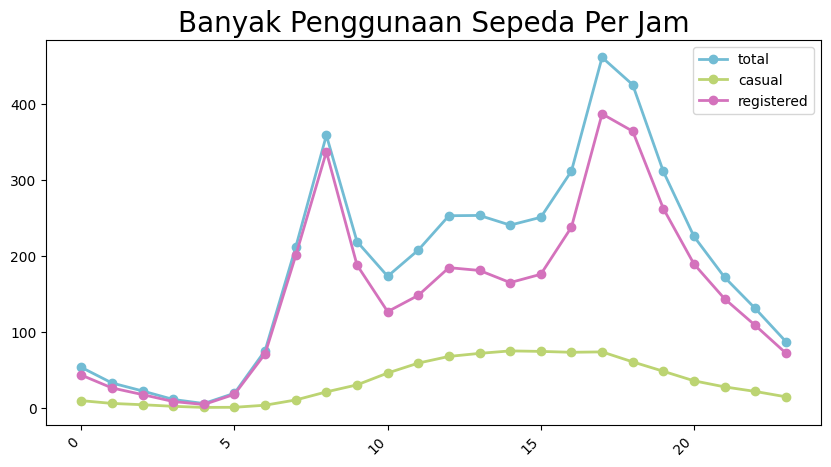

In [81]:
plt.figure(figsize=(10, 5))

plt.plot(hourly_df["hr"], hourly_df["cnt"], label="total", marker='o', linewidth=2, color='#72BCD4')
plt.plot(hourly_df["hr"], hourly_df["casual"], label="casual", marker='o', linewidth=2, color='#BCD472')
plt.plot(hourly_df["hr"], hourly_df["registered"], label="registered", marker='o', linewidth=2, color='#D472BC')

plt.title("Banyak Penggunaan Sepeda Per Jam", fontsize=20)
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10)
plt.legend()
plt.show()

Dapat dilihat bahwa
- grafik rerata pengguna **teregistrasi** dan **keseluruhan** relatif sama, dengan terjadi **puncak** pada pukul **8** dan **17-18**, **kenaikam tajam** pada pukul **5-8** dan **15-17**, serta **penurunan tajam** pada pukul **8-10** dan **18-20** yang diikuti **penurunan konstan** dari pukul **20** hingga pukul **4**,
- rerata pengguna **kasual** relatif **landai** dengan nilai rerata pada siang dan sore hari (pukul **12-18**) lebih tinggi dibandingkan pada jam-jam lainnya.

Hal ini menunjukkan bahwa ada korelasi antara rerata pengguna **teregistrasi** dan **keseluruhan** serta **busy hour** (jam berangkat dan pulang kerja). Di lain pihak, rerata pengguna kasual tidak terlalu dipengaruhi oleh **busy hour**.

**Insight:**
- Rerata pengguna **teregistrasi dan keseluruhan** memiliki grafik dan pola yang **relatif sama**, dengan nilai mencapai **puncak** pada **hari kerja**, di **musim panas** dan **pertengahan tahun**, serta saat **busy hour**.
- Rerata pengguna **kasual** mengalami **puncak** pada **hari libur/akhir pekan**. Kenaikan signifikan terjadi di **musim semi dan panas** (pertengahan tahun) dengan nilai relatif **sama**. Aktivitas per jam juga relatif **sama** dengan sedikit kenaikan terjadi pada **siang dan sore** hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Untuk mengetahui trend total penggunaan sepeda dari bulan ke bulan, dibuat dataframe baru yang mengubah frekuensi dari harian ke bulanan dari dataframe day_df.

In [82]:
month_df = day_df.resample(rule="ME", on="dteday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

# mengubah format index menjadi nama bulan
month_df.index = month_df.index.strftime('%B %Y')

month_df = month_df.reset_index()
month_df.rename(columns={
    "dteday": "month"
}, inplace=True)
month_df.head()

,month,casual,registered,cnt
0,January 2011,3073,35116,38189
1,February 2011,6242,41973,48215
2,March 2011,12826,51219,64045
3,April 2011,22346,72524,94870
4,May 2011,31050,104771,135821


Dari data tabel di atas, dibuat grafik sebagai berikut.

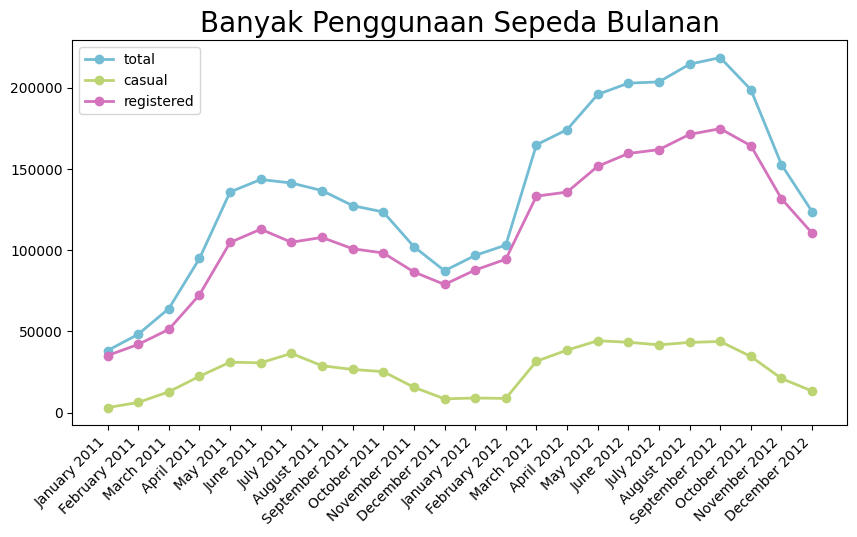

In [83]:
plt.figure(figsize=(10, 5))

plt.plot(month_df["month"], month_df["cnt"], label="total", marker='o', linewidth=2, color='#72BCD4')
plt.plot(month_df["month"], month_df["casual"], label="casual", marker='o', linewidth=2, color='#BCD472')
plt.plot(month_df["month"], month_df["registered"], label="registered", marker='o', linewidth=2, color='#D472BC')

plt.title("Banyak Penggunaan Sepeda Bulanan", fontsize=20)
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10)
plt.legend()
plt.show()


**Insight:**
Dari grafik di atas, diperoleh insight sebagai berikut.
- Total pengguna sepeda **keseluruhan naik** dari **Januari-Mei 2011** kemudian mulai **melandai** dan terjadi **penurunan perlahan** pada **Mei-Oktober 2011**. Setelah itu, terjadi **penurunan tajam** dari **Oktober-Desember 2011**.
- Berikutnya, pada periode **Januari-Februari 2012** terjadi **kenaikan** yang diikuti **lompatan** pada bulan **Maret 2012**. Pada periode **Maret-September 2012** terjadi **kenaikan yang signifikan** dengan diikuti **penurunan tajam** pada **September-Desember 2012**.
- Tren yang **serupa** terjadi pada total pengguna sepeda **kasual** dan **terdaftar**.
- Dapat dilihat juga bahwa total penggunaan sepeda pada April-September (**kuartal kedua dan ketiga**) lebih **tinggi** daripada pada bulan Oktober-Maret (**kuartal pertama dan keempat**).

### Pertanyaan 2:

Untuk mencari tahu hari dengan total penggunaan sepeda tertinggi, maka dibuat dataframe baru seperti berikut.

In [84]:
daily_df = day_df.copy()

# membuat kolom hari
daily_df["day"] = daily_df["dteday"].dt.day_name()
daily_df = daily_df.groupby(by="day").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
daily_df = daily_df.reset_index()
daily_df

,day,casual,registered,cnt
0,Friday,78238,409552,487790
1,Monday,70784,384719,455503
2,Saturday,153852,323955,477807
3,Sunday,140521,303506,444027
4,Thursday,61460,423935,485395
5,Tuesday,57843,411266,469109
6,Wednesday,57319,415729,473048


Selanjutnya dari tabel tersebut, diperoleh grafik berikut.

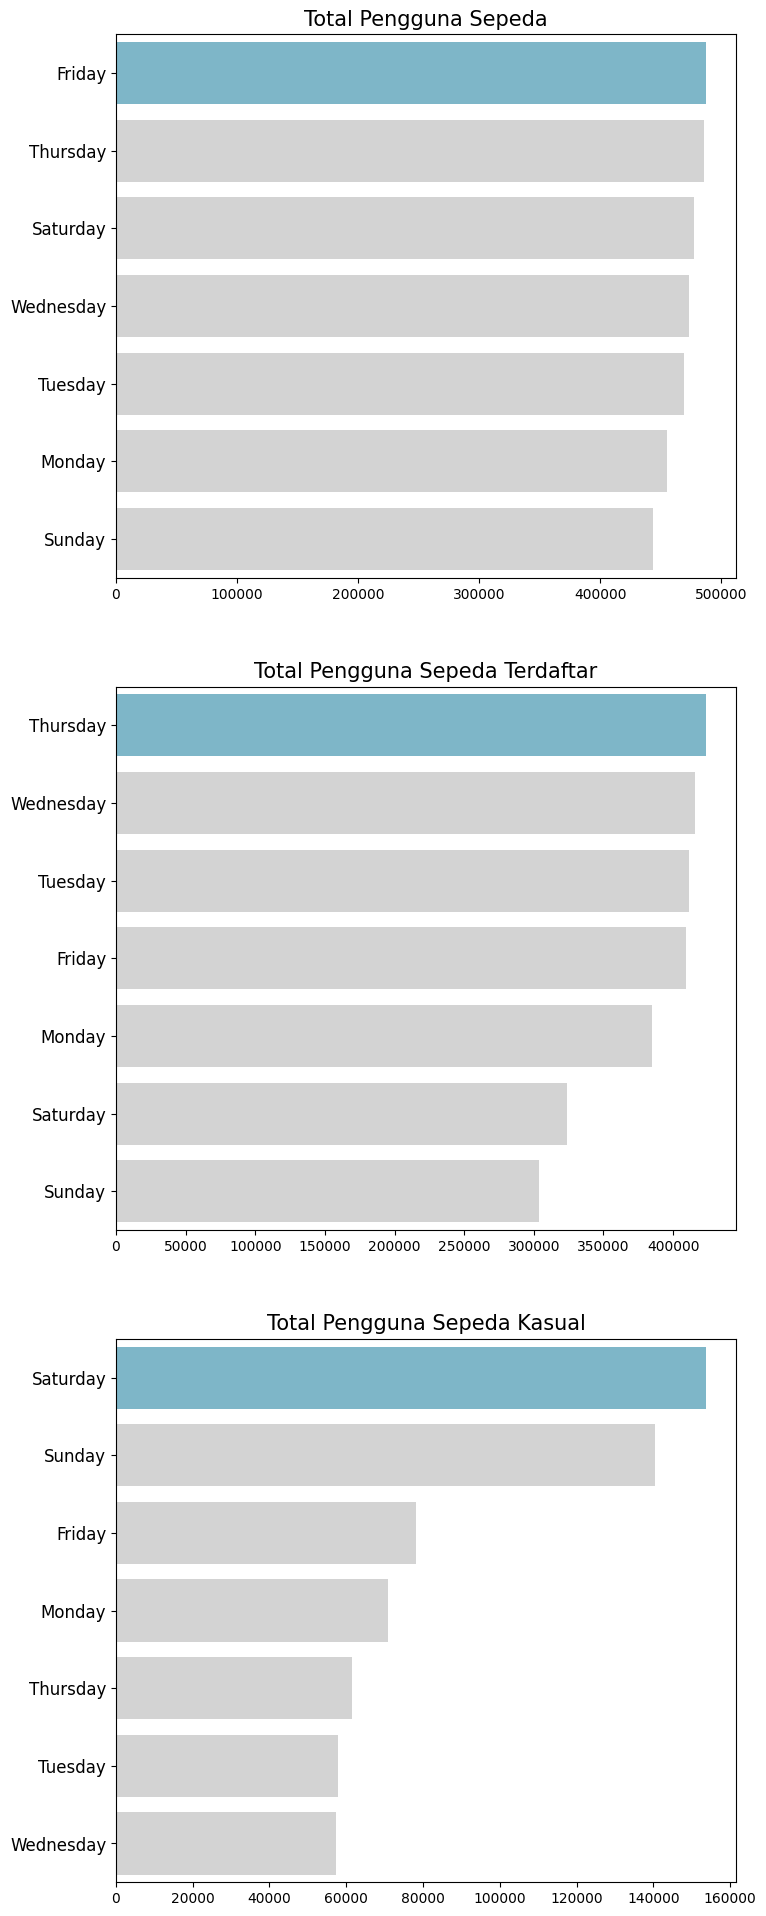

In [85]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 24))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="day", hue="day", x="cnt", data=daily_df.sort_values(by=["cnt"], ascending=False), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Total Pengguna Sepeda", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(y="day", hue="day",x="registered", data=daily_df.sort_values(by=["registered"], ascending=False), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Total Pengguna Sepeda Terdaftar", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)

sns.barplot(y="day", hue="day", x="casual", data=daily_df.sort_values(by=["casual"], ascending=False), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Total Pengguna Sepeda Kasual", loc="center", fontsize=15)
ax[2].tick_params(axis ='y', labelsize=12)



**Insight:**
Dari visualisasi di atas, diperoleh bahwa
- total pengguna sepeda **keseluruhan** mencapai **maksimum** pada hari **jumat** dengan persebaran data yang cukup **merata** (variansi data rendah, perbedaan total pengguna sepeda keseluruhan antar hari tidak terlalu signifikan),
- total pengguna sepeda **terdaftar** mencapai **maksimum** pada hari ""kamis** dengan total pengguna sepeda terdaftar lebih **banyak** pada **hari kerja** dibandingkan akhir pekan, dan
- total pengguna sepeda **kasual** mencapai maksimum pada hari **sabtu** dengan total pengguna sepeda kasual lebih **banyak** pada **akhir pekan** dibandingkan hari kerja.

## Analisis Lanjutan (Opsional)

Dari pertanyaan pertama sebelumnya, **diperoleh gambaran** dari penggunaan sepeda per kuartal. **Untuk memperjelas gambaran tersebut**, akan dibuat visualisasi data total penggunaan sepeda per kuartal dengan menggunakan **metode binning**. Sebelumnya, akan dibuat dataframe yang mengubah frekuensi dataframe day_df menjadi per kuartal.

In [86]:
quarter_df = day_df.copy()

# membuat kolom kuartal
quarter_df["quarter"] = quarter_df["dteday"].dt.strftime('%Y-Q') + quarter_df['dteday'].dt.quarter.astype('string')
quarter_df = quarter_df.groupby(by="quarter").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
quarter_df = quarter_df.reset_index()
quarter_df

,quarter,casual,registered,cnt
0,2011-Q1,22141,128308,150449
1,2011-Q2,84008,290195,374203
2,2011-Q3,91839,313611,405450
3,2011-Q4,49264,263737,313001
4,2012-Q1,49308,315448,364756
5,2012-Q2,125985,446934,572919
6,2012-Q3,128680,508003,636683
7,2012-Q4,68792,406426,475218


Dari tabel di atas, dibuat visualisasi data berupa bar chart sebagai berikut.

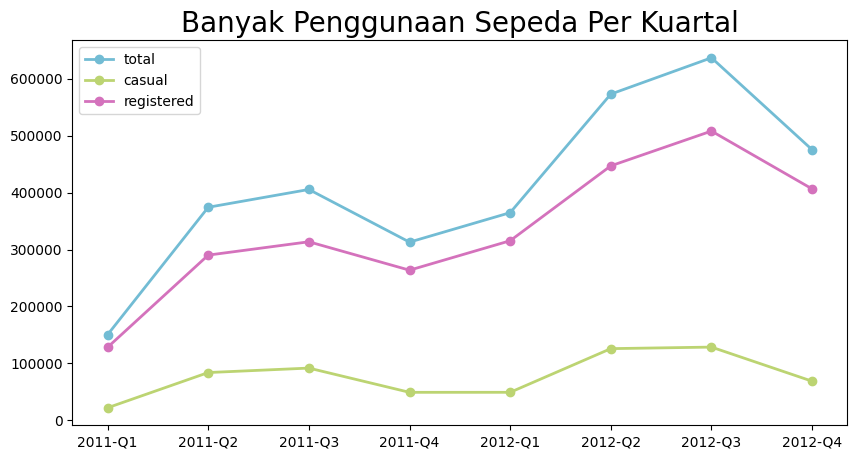

In [87]:
plt.figure(figsize=(10, 5))

plt.plot(quarter_df["quarter"], quarter_df["cnt"], label="total", marker='o', linewidth=2, color='#72BCD4')
plt.plot(quarter_df["quarter"], quarter_df["casual"], label="casual", marker='o', linewidth=2, color='#BCD472')
plt.plot(quarter_df["quarter"], quarter_df["registered"], label="registered", marker='o', linewidth=2, color='#D472BC')

plt.title("Banyak Penggunaan Sepeda Per Kuartal", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

Dapat dilihat secara lebih jelas bahwa **kuartal kedua dan ketiga** memiliki total pengguna sepeda **keseluruhan, kasual dan terdaftar** yang lebih **tinggi** dibandingkan pada kuartal pertama dan keempat.

## Conclusion

- Total pengguna sepeda keseluruhan, terdaftar dan kasual mengalami **kenaikan** pada **awal tahun** yang kemudian mengalami **penurunan** pada **akhir tahun** sehingga banyak pengguna pada **kuartal kedua dan ketiga lebih tinggi** daripada **kuartal pertama dan keempat**.
- Total pengguna sepeda keseluruhan, terdaftar dan kasual, secara berturut-turut, paling banyak pada hari **jumat, kamis** dan **sabtu**.